In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
dataset = pd.read_csv('Battery_RUL.csv')

In [3]:
# Preprocessing
features = dataset[['Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)',
                    'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']]
# Determine an appropriate threshold for binary classification

In [4]:
# Determine an appropriate threshold for binary classification
threshold = 69
# Create a binary column based on the threshold
dataset['RUL_binary'] = (dataset['RUL'] <= threshold).astype(int)
target = dataset['RUL_binary']
# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, dataset['RUL'], test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
# Create the KNN model
knn_model = KNeighborsRegressor(n_neighbors=9)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train_scaled, y_train)
# Make predictions on the training set
y_pred_train = knn_model.predict(X_train_scaled)
# Evaluate the model on the training set
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Training R-squared: {r2_train}')
print(f'Training Mean Squared Error: {mse_train}')

Training R-squared: 0.989170080663237
Training Mean Squared Error: 1126.1646445699619


In [5]:
# Make predictions on the validation set
y_pred_valid = knn_model.predict(X_valid_scaled)
# Evaluate the model on the validation set
r2_valid = r2_score(y_valid, y_pred_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
print(f'Validation R-squared: {r2_valid}')
print(f'Validation Mean Squared Error: {mse_valid}')

Validation R-squared: 0.9846729609106758
Validation Mean Squared Error: 1558.33216431771


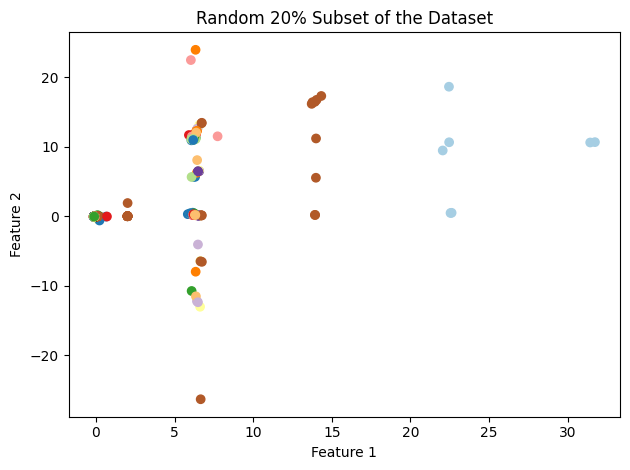

In [6]:
# Plot original features visualization
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('Random 20% Subset of the Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()
